In [19]:
import pandas as pd
df=pd.read_csv("美国失业金_label.csv",index_col="date")
df.head()

,time,now_1,correction_1,previous_1,now_2,correction_2,previous_2,predict_1,predict_2,now_3,correction_3,previous_3,label
date,,,,,,,,,,,,,
2023/1/5,21:30:00,204,223,225,1694,1718,1710,225,1708.0,214.00,221.00,221.00,-1
2022/12/29,21:30:00,225,216,216,1710,1669,1672,225,1686.0,220.50,221.75,221.75,-1
2022/12/22,21:30:00,216,214,211,1672,1678,1671,222,1683.0,220.50,228.00,227.25,-1
2022/12/15,21:30:00,211,231,230,1671,1670,1671,230,1671.0,226.50,230.25,230.00,1
2022/12/8,21:30:00,230,226,225,1671,1609,1608,230,1600.0,229.25,229.00,228.75,1


In [20]:
df=df.dropna(axis=0)
print(df.isnull().sum())
df.shape

time            0
now_1           0
correction_1    0
previous_1      0
now_2           0
correction_2    0
previous_2      0
predict_1       0
predict_2       0
now_3           0
correction_3    0
previous_3      0
label           0
dtype: int64


(199, 13)

In [21]:
def function(x,y):
    return x-y
df.insert(df.shape[1]-1,"now_predict_sub_1",list(map(lambda x,y:function(x,y),df["now_1"],df["predict_1"])))
df.insert(df.shape[1]-1,"now_previous_sub_1",list(map(lambda x,y:function(x,y),df["now_1"],df["previous_1"])))
df.insert(df.shape[1]-1,"now_correction_sub_1",list(map(lambda x,y:function(x,y),df["now_1"],df["correction_1"])))

df.insert(df.shape[1]-1,"now_predict_sub_2",list(map(lambda x,y:function(x,y),df["now_2"],df["predict_2"])))
df.insert(df.shape[1]-1,"now_previous_sub_2",list(map(lambda x,y:function(x,y),df["now_2"],df["previous_2"])))
df.insert(df.shape[1]-1,"now_correction_sub_2",list(map(lambda x,y:function(x,y),df["now_2"],df["correction_2"])))

df.insert(df.shape[1]-1,"now_previous_sub_3",list(map(lambda x,y:function(x,y),df["now_3"],df["previous_3"])))
df.insert(df.shape[1]-1,"now_correction_sub_3",list(map(lambda x,y:function(x,y),df["now_3"],df["correction_3"])))

In [29]:
# fence=20
fence=23
test_times=df["time"][:fence].tolist()
test_times

['21:30:00',
 '21:30:00',
 '21:30:00',
 '21:30:00',
 '21:30:00',
 '21:30:00',
 '21:30:00',
 '21:30:00',
 '21:30:00',
 '20:30:00',
 '20:30:00',
 '20:30:00',
 '20:30:00',
 '20:30:00',
 '20:30:00',
 '20:30:00',
 '20:30:00',
 '20:30:00',
 '20:30:00',
 '20:30:00',
 '20:30:00',
 '20:30:00',
 '20:30:00']

In [30]:
df

,time,now_1,correction_1,previous_1,now_2,correction_2,previous_2,predict_1,predict_2,now_3,...,previous_3,now_predict_sub_1,now_previous_sub_1,now_correction_sub_1,now_predict_sub_2,now_previous_sub_2,now_correction_sub_2,now_previous_sub_3,now_correction_sub_3,label
date,,,,,,,,,,,,,,,,,,,,,
2023/1/5,21:30:00,204,223,225,1694,1718,1710,225,1708.0,214.00,...,221.00,-21,-21,-19,-14.0,-16,-24,-7.00,-7.00,-1
2022/12/29,21:30:00,225,216,216,1710,1669,1672,225,1686.0,220.50,...,221.75,0,9,9,24.0,38,41,-1.25,-1.25,-1
2022/12/22,21:30:00,216,214,211,1672,1678,1671,222,1683.0,220.50,...,227.25,-6,5,2,-11.0,1,-6,-6.75,-7.50,-1
2022/12/15,21:30:00,211,231,230,1671,1670,1671,230,1671.0,226.50,...,230.00,-19,-19,-20,0.0,0,1,-3.50,-3.75,1
2022/12/8,21:30:00,230,226,225,1671,1609,1608,230,1600.0,229.25,...,228.75,0,5,4,71.0,63,62,0.50,0.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018/2/22,21:30:00,222,229,230,1875,1948,1942,230,1930.0,225.75,...,228.50,-8,-8,-7,-55.0,-67,-73,-2.75,-2.50,-1
2018/2/8,21:30:00,221,230,230,1923,1956,1953,236,1945.0,226.00,...,234.50,-15,-9,-9,-22.0,-30,-33,-8.50,-8.50,-1
2018/2/1,21:30:00,230,231,233,1953,1940,1937,238,1928.0,236.00,...,240.00,-8,-3,-1,25.0,16,13,-4.00,-3.50,-1


In [31]:
X=df.drop(columns=["label","time"])
Y=df.label

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 2023/1/5 to 2018/1/11
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   now_1                 199 non-null    int64  
 1   correction_1          199 non-null    int64  
 2   previous_1            199 non-null    int64  
 3   now_2                 199 non-null    int64  
 4   correction_2          199 non-null    int64  
 5   previous_2            199 non-null    int64  
 6   predict_1             199 non-null    int64  
 7   predict_2             199 non-null    float64
 8   now_3                 199 non-null    float64
 9   correction_3          199 non-null    float64
 10  previous_3            199 non-null    float64
 11  now_predict_sub_1     199 non-null    int64  
 12  now_previous_sub_1    199 non-null    int64  
 13  now_correction_sub_1  199 non-null    int64  
 14  now_predict_sub_2     199 non-null    float64
 15  now_previous_su

In [33]:
X_train= X[fence:] # Train
X_test = X[:fence] # Test
Y_train=Y[fence:]
Y_test=Y[:fence]
print(X_train.shape, Y_train.shape)
print(X_test.shape,Y_test.shape)

(176, 19) (176,)
(23, 19) (23,)


In [34]:
X_test

,now_1,correction_1,previous_1,now_2,correction_2,previous_2,predict_1,predict_2,now_3,correction_3,previous_3,now_predict_sub_1,now_previous_sub_1,now_correction_sub_1,now_predict_sub_2,now_previous_sub_2,now_correction_sub_2,now_previous_sub_3,now_correction_sub_3
date,,,,,,,,,,,,,,,,,,,
2023/1/5,204,223,225,1694,1718,1710,225,1708.0,214.00,221.00,221.00,-21,-21,-19,-14.0,-16,-24,-7.00,-7.00
2022/12/29,225,216,216,1710,1669,1672,225,1686.0,220.50,221.75,221.75,0,9,9,24.0,38,41,-1.25,-1.25
2022/12/22,216,214,211,1672,1678,1671,222,1683.0,220.50,228.00,227.25,-6,5,2,-11.0,1,-6,-6.75,-7.50
2022/12/15,211,231,230,1671,1670,1671,230,1671.0,226.50,230.25,230.00,-19,-19,-20,0.0,0,1,-3.50,-3.75
2022/12/8,230,226,225,1671,1609,1608,230,1600.0,229.25,229.00,228.75,0,5,4,71.0,63,62,0.50,0.25
2022/12/1,225,241,240,1608,1551,1551,235,1573.0,228.00,227.00,226.75,-10,-15,-16,35.0,57,57,1.25,1.00
2022/11/23,240,223,222,1551,1503,1507,225,1517.0,226.00,221.25,221.00,15,18,17,34.0,44,48,5.00,4.75
2022/11/17,222,226,225,1507,1494,1493,225,1500.0,220.25,219.00,218.75,-3,-3,-4,7.0,14,13,1.50,1.25
2022/11/10,225,218,217,1493,1487,1485,220,1475.0,218.25,219.00,218.75,5,8,7,18.0,8,6,-0.50,-0.75


预测正确与错误个数:
 True     18
False     5
Name: label, dtype: int64
训练集准确率: 1.0
测试集准确率: 0.782608695652174
['now_1', 'correction_1', 'previous_1', 'now_2', 'correction_2', 'previous_2', 'predict_1', 'predict_2', 'now_3', 'correction_3', 'previous_3', 'now_predict_sub_1', 'now_previous_sub_1', 'now_correction_sub_1', 'now_predict_sub_2', 'now_previous_sub_2', 'now_correction_sub_2', 'now_previous_sub_3', 'now_correction_sub_3']
19


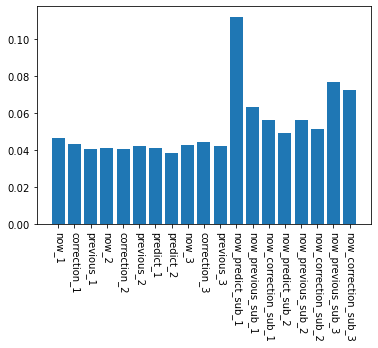

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
#clf=RandomForestClassifier(oob_score=True,max_depth=5,n_estimators=32,bootstrap=True,random_state=10) #设置random_state
#clf=DecisionTreeClassifier(max_depth=4)
#clf=LogisticRegression(penalty='l2')
#clf=SVC()
#clf=GradientBoostingClassifier(max_depth=4)
clf=ExtraTreesClassifier(max_depth=30,n_estimators=400,criterion='entropy',random_state=10)
clf.fit(X_train,Y_train)
predict=clf.predict(X_test)
print("预测正确与错误个数:\n",(predict==Y_test).value_counts())
print("训练集准确率:",clf.score(X_train,Y_train))
print("测试集准确率:",clf.score(X_test,Y_test))
import matplotlib.pyplot as plt
features=X_train.columns.tolist()
feature_importance=clf.feature_importances_.tolist()
#for i,j in zip(X_train.columns,clf.feature_importances_):
    #print(i,j)
print(features)
print(len(features))
#print(feature_importance)
plt.xticks(rotation=270)
plt.bar(features,feature_importance)
plt.show()

In [35]:
# import catboost as cb
# #clf=RandomForestClassifier(oob_score=True,max_depth=5,n_estimators=32,bootstrap=True,random_state=10) #设置random_state
# #clf=DecisionTreeClassifier(max_depth=4)
# #clf=LogisticRegression(penalty='l2')
# #clf=SVC()
# #clf=GradientBoostingClassifier(max_depth=4)
#
# clf=cb.CatBoostClassifier()
# clf.fit(X_train,Y_train)
# predict=clf.predict(X_test)
# print("预测正确与错误个数:\n",(predict==Y_test).value_counts())
# print("训练集准确率:",clf.score(X_train,Y_train))
# print("测试集准确率:",clf.score(X_test,Y_test))
# import matplotlib.pyplot as plt
# features=X_train.columns.tolist()
# feature_importance=clf.feature_importances_.tolist()
# #for i,j in zip(X_train.columns,clf.feature_importances_):
#     #print(i,j)
# print(features)
# print(len(features))

In [36]:
print(predict==Y_test)

date
2023/1/5       True
2022/12/29    False
2022/12/22     True
2022/12/15    False
2022/12/8      True
2022/12/1      True
2022/11/23    False
2022/11/17     True
2022/11/10     True
2022/10/27    False
2022/10/20     True
2022/10/13    False
2022/10/6      True
2022/9/29      True
2022/9/22      True
2022/9/15      True
2022/9/8       True
2022/9/1       True
2022/8/25      True
2022/8/18      True
2022/8/11      True
2022/8/4       True
2022/7/28      True
Name: label, dtype: bool


In [37]:
from skl2onnx import __max_supported_opset__
print("Last supported opset:",__max_supported_opset__)


Last supported opset: 17


In [38]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx.common.data_types import Int64TensorType
from skl2onnx.common.data_types import DoubleTensorType
initial_type = [('input_1', DoubleTensorType([1,19]))]
final_type=[('classification_head_1',FloatTensorType([1])),('classification_head_2',FloatTensorType([1]))]
onx = convert_sklearn(clf, initial_types=initial_type,final_types=final_type,options={'zipmap': False})
# onx = convert_sklearn(clf, initial_types=initial_type)
del onx.graph.output[1]
with open("UNE.onnx", "wb") as f:
    f.write(onx.SerializeToString())

C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Dell\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
import onnxruntime as rt
import numpy as np
sess = rt.InferenceSession("UNE.onnx")
input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name
output=sess.get_outputs()
index=2
pred_onx = sess.run([label_name], {input_name: np.array(X_test.iloc[index,]).reshape(1,19).astype(np.double)})

# print info
print('input_name: ' + input_name)
print('label_name: ' + label_name)
print("date:",X_test.index[index],"true_label:",Y_test[index])
print("predict_label:",pred_onx)

input_name: input_1
label_name: classification_head_1
date: 2022/12/22 true_label: -1
predict_label: [array([-1.], dtype=float32)]


In [14]:
pd.concat([pd.DataFrame(predict==Y_test).rename(columns={"label":"True/False"}),pd.DataFrame(Y_test).rename(columns={"label":"True_label"}),
           pd.DataFrame(predict,index=X_test.index).rename(columns={0:"predict_label"})],axis=1)

,True/False,True_label,predict_label
date,,,
2023/1/5,True,-1,-1
2022/12/29,False,-1,1
2022/12/22,True,-1,-1
2022/12/15,False,1,-1
2022/12/8,True,1,1
2022/12/1,True,-1,-1
2022/11/23,False,-1,1
2022/11/17,True,1,1
2022/11/10,True,1,1


In [48]:
np.array(X_test.iloc[2,]).reshape(1,19).astype(np.double).tolist()

[[216.0,
  214.0,
  211.0,
  1672.0,
  1678.0,
  1671.0,
  222.0,
  1683.0,
  220.5,
  228.0,
  227.25,
  -6.0,
  5.0,
  2.0,
  -11.0,
  1.0,
  -6.0,
  -6.75,
  -7.5]]

In [49]:
print(X_test.columns)
print(len(X_test.columns))

Index(['now_1', 'correction_1', 'previous_1', 'now_2', 'correction_2',
       'previous_2', 'predict_1', 'predict_2', 'now_3', 'correction_3',
       'previous_3', 'now_predict_sub_1', 'now_previous_sub_1',
       'now_correction_sub_1', 'now_predict_sub_2', 'now_previous_sub_2',
       'now_correction_sub_2', 'now_previous_sub_3', 'now_correction_sub_3'],
      dtype='object')
19


In [15]:
print(len(predict))
import numpy as np

#回测
HoldingTime = '30000'
test_dates = np.array(X_test.index.tolist())
test_times = np.array(test_times)
test_preds = np.array(list(map(str, predict)))
test_TradingPair = np.array(['XAU/USD'] * len(Y_test))
test_HoldingTime = np.array([HoldingTime] * len(Y_test))
df = pd.DataFrame(np.hstack((test_dates[:, np.newaxis], test_times[:, np.newaxis], test_preds[:, np.newaxis],
                             test_TradingPair[:, np.newaxis], test_HoldingTime[:, np.newaxis])),
                  columns=['Date', 'Time', 'label', 'TradingPair', 'HoldingTime'])
df.to_csv('美国失业金首单_backtest.csv', index=False)

23


In [17]:
backtest_df=pd.read_csv("美国失业金首单_backtest.csv")
backtest_df

,Date,Time,label,TradingPair,HoldingTime
0,2022/12/29,21:30:00,1,XAU/USD,30000
1,2022/12/22,21:30:00,-1,XAU/USD,30000
2,2022/12/15,21:30:00,-1,XAU/USD,30000
3,2022/12/8,21:30:00,1,XAU/USD,30000
4,2022/12/1,21:30:00,-1,XAU/USD,30000
5,2022/11/23,21:30:00,1,XAU/USD,30000
6,2022/11/17,21:30:00,1,XAU/USD,30000
7,2022/11/10,21:30:00,1,XAU/USD,30000
8,2022/10/27,20:30:00,1,XAU/USD,30000
9,2022/10/20,20:30:00,-1,XAU/USD,30000
